# Analysis of results from experimental campaign

This notebook explores and visualize the results on `MicroGridEnv` adopting different strategies. The results are retrieved from some `json`files employed to store the outcome from the testing of each tested algorithm. <br>
The plots shown here have been also used within the paper.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/ernesto-gym


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.transforms import Bbox
import pandas as pd
from tqdm import tqdm 
from datetime import datetime
import os
import orjson as json
from pathlib import Path
from collections import OrderedDict

from ernestogym.envs.single_agent.env import MicroGridEnv
from ernestogym.envs.single_agent.utils import parameter_generator

sns.set_style('darkgrid')
plot_colors = sns.color_palette()

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          #"axes.edgecolor" : "black",
          "text.usetex" : True,
          "text.latex.preamble": r'\usepackage{amsmath} \usepackage{amssymb}',
          "font.family": "serif",
          "font.serif" : ["Computer Modern Serif"],
          "font.size": 18
         }
plt.rcParams.update(params)

plots_dir = 'examples/single_agent/plots/ijcnn25'
os.makedirs(plots_dir, exist_ok=True)

In [7]:
alg_color = OrderedDict({
    'random': plot_colors[0],
    'only_market': plot_colors[1],
    'battery_first': plot_colors[2],
    '20-80': plot_colors[3],
    '50-50': plot_colors[4],
    '80-20': plot_colors[5],
    'ppo': plot_colors[0],
    'a2c': plot_colors[6],
    'sac': plot_colors[7],
    'ppo_fixed_market_tamb': plot_colors[6],
    'ppo_fixed_tamb': plot_colors[7],
    'ppo_25eps': plot_colors[8],
    'ppo-no_retrain': plot_colors[9]
})

alg_markers = OrderedDict({
    'random': '.',
    'only_market': 'o',
    'battery_first': 'v',
    '20-80': 's',
    '50-50': 'P',
    '80-20': 'D',
    'ppo': '*',
    'a2c': '+',
    'sac': '<',
    'ppo_fixed_market_tamb': '+',
    'ppo_fixed_tamb': '>',
    'ppo_25eps': '',
    'ppo-no_retrain': ''
})

In [8]:
exp_name = "BEST-IJCNN_2015-2020_deg_new-norm_clip0_1_socmax_gamma0_99_new-market"
folder = "./logs/{}/results/".format(exp_name)

In [9]:
algs = [f for f in alg_color.keys() if f in os.listdir(folder)]

In [10]:
#algs.remove('random')
#algs.remove('battery_first')
#algs.remove('50-50')
#algs.remove('20-80')

In [11]:
algs

['random',
 'only_market',
 'battery_first',
 '20-80',
 '50-50',
 '80-20',
 'ppo',
 'ppo_fixed_market_tamb',
 'ppo_fixed_tamb',
 'ppo_25eps']

In [12]:
def load_results(alg:str):

    alg_res = []

    results_folder = folder + alg +'/'
    tests_files = [f for f in os.listdir(results_folder)]

    for file in tqdm(tests_files):
        f = open (results_folder + file, "r")
        data = json.loads(f.read())
        alg_res.append(data)

    return alg_res

In [13]:
res_dict = {}

for alg in algs:
    res_dict[alg] = load_results(alg)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 122.26it/s]


In [14]:
timestamps = pd.read_csv("ernestogym/ernesto/data/generation/pv_ninja_2019-2020_3kW_test.csv", usecols=['timestamp'])['timestamp'].values.tolist()

In [15]:
timestamps = [datetime.strptime(time, "%Y-%m-%d %H:%M:%S") for time in timestamps[1:]]

In [16]:
alg_names = {
    'a2c': 'A2C',
    'battery_first': 'BF',
    '20-80': '20-80',
    'random': 'Random',
    'ppo': r'RL$^{\star}$',
    '50-50': '50-50',
    '80-20': '80-20',
    'only_market': 'OG',
    'sac': 'SAC',
    'ppo_fixed_market_tamb': 'RL-base',
    'ppo_fixed_tamb': 'RL-base+',
    'ppo_25eps': 'PPO_25EPS',
    'ppo-no_retrain': 'PPO_NO-RETRAIN'
}

In [17]:
def savefig(fig: plt.Figure, filename: str, extent=None, **kwargs) -> None:
    if not do_not_save:
        save_path = os.path.join(plots_dir, filename)
        fig.savefig(save_path, dpi=300, bbox_inches=extent if extent is not None else'tight', **kwargs)

In [19]:
do_not_save = True

In [105]:
profile = 0

soc = [elem[1] for elem in res_dict['ppo'][profile]['states']]
temp = [elem[0] for elem in res_dict['ppo'][profile]['states']]
gen = [elem[3] for elem in res_dict['ppo'][profile]['states']]
demand = [elem[2] for elem in res_dict['ppo'][profile]['states']]
ask = [elem[4] * 1000 for elem in res_dict['ppo'][profile]['states']]
bid = [elem[5] * 1000 for elem in res_dict['ppo'][profile]['states']]
actions = [elem[0] for elem in res_dict['ppo'][profile]['actions']]
traded = [elem for elem in res_dict['ppo'][profile]['traded_energy']]
stored = (np.array(gen[:-1]) - np.array(demand[:-1])) * np.array(actions)
stored = stored.tolist()

In [106]:
stored

[-856.0,
 -504.0,
 -361.0,
 -93.0,
 -79.0,
 -81.0,
 -80.0,
 247.0,
 0.0,
 0.0,
 0.0,
 25.47560977935791,
 798.0,
 665.0,
 -811.0,
 -220.0,
 -273.0,
 -223.0,
 -226.0,
 -134.0,
 -290.0,
 -336.0,
 -326.0,
 -84.0,
 -61.0,
 -189.0,
 -72.0,
 -100.0,
 -70.0,
 -100.0,
 -44.0,
 271.0,
 0.0,
 0.0,
 232.2080159187317,
 0.0,
 0.0,
 227.0,
 289.0,
 -108.0,
 -310.0,
 -206.0,
 -142.0,
 -65.0,
 -811.0,
 -380.0,
 -169.0,
 -73.0,
 -69.0,
 -101.0,
 -142.0,
 -98.0,
 -95.0,
 -70.0,
 -85.0,
 246.0,
 0.0,
 0.0,
 0.0,
 0.0,
 580.7478774189949,
 0.0,
 400.0,
 -58.0,
 -236.0,
 -306.0,
 -243.0,
 -310.0,
 -898.0,
 -404.0,
 -388.0,
 -278.0,
 -224.0,
 -127.0,
 -91.0,
 -70.0,
 -123.0,
 -71.0,
 -85.0,
 194.0,
 554.0,
 0.0,
 0.0,
 0.0,
 317.0,
 543.0,
 194.0,
 -128.0,
 -273.0,
 -263.0,
 -143.0,
 -124.0,
 -277.0,
 -61.0,
 -73.0,
 -74.0,
 -131.0,
 -121.0,
 -68.0,
 -79.0,
 -95.0,
 -69.0,
 -55.0,
 236.0,
 0.0,
 201.77936124801636,
 0.0,
 0.0,
 0.0,
 640.0,
 174.0,
 -254.0,
 -440.0,
 -372.0,
 -349.0,
 -152.0,
 -60.0,
 -88.

In [111]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'browser'  # Use browser to display

# ---- Data from your simulation ----
# Make sure these are already defined
# soc, temp, gen, demand, aks, bid, actions

# Time axis
time_steps = list(range(1000)) #list(range(len(soc)))

# Variables and labels
variables = {
    "Generazione": gen,
    "SOC": soc,
    "Potenza Immagazzinata": stored,
    "Consumo": demand,
    "Temperatura": temp,
    "Potenza Immessa nella Rete": traded,
    "Prezzo di Acquisto": ask,
    "Prezzo di Vendita": bid,
    #"Action": actions
}

# Choose grid size (e.g., 4 rows x 2 cols for 7 plots)
rows = 3
cols = 3

# Create subplot grid
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=list(variables.keys()),
    vertical_spacing=0.1,
    horizontal_spacing=0.05
)

# Store trace references for each subplot
trace_refs = []

# Add empty traces to each subplot for animation
i = 0
for r in range(1, rows + 1):
    for c in range(1, cols + 1):
        if i >= len(variables):
            break
        name = list(variables.keys())[i]
        trace = go.Scatter(x=[], y=[], mode='lines+markers', name=name)
        fig.add_trace(trace, row=r, col=c)
        trace_refs.append((r, c))
        i += 1

# Animation frames
frames = []
for t in range(1, len(time_steps) + 1):
    frame_data = []
    for idx, (name, data) in enumerate(variables.items()):
        if idx < len(trace_refs):
            row, col = trace_refs[idx]
            frame_data.append(go.Scatter(
                x=time_steps[:t],
                y=data[:t],
                mode='lines+markers',
            ))
    frames.append(go.Frame(data=frame_data, name=str(t)))

fig.frames = frames

# Layout controls
fig.update_layout(
    height=800,
    width=1500,
    title_text="Animated Time Series - Multi-Panel View",
    showlegend=False,
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[
            dict(label="Play", method="animate", args=[None, {
                "frame": {"duration": 100, "redraw": True},
                "fromcurrent": True
            }]),
            dict(label="Pause", method="animate", args=[[None], {
                "frame": {"duration": 0, "redraw": False},
                "mode": "immediate"
            }])
        ],
        x=1.05, y=1
    )],
    sliders=[dict(
        steps=[dict(method='animate',
                    args=[[str(t)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    label=str(t)) for t in range(1, len(time_steps) + 1)],
        transition=dict(duration=0),
        x=0, y=0,
        currentvalue=dict(font=dict(size=12), prefix="Step: ", visible=True),
        len=1.0
    )]
)

# Custom Y-axis labels
y_labels = {
    "Generazione": "Wh",
    "SOC": None,
    "Potenza Immagazzinata": "Wh",
    "Consumo": "Wh",
    "Temperatura": "K",
    "Potenza Immessa nella Rete": "Wh",
    "Prezzo di Acquisto": "€/kWh",
    "Prezzo di Vendita": "€/kWh"
}

# Italian x-axis label
x_label = "Tempo (ore)"

# Apply to each subplot
for idx, (row, col) in enumerate(trace_refs):
    axis_idx = idx + 1
    var_name = list(variables.keys())[idx]
    fig.update_layout({
        f'xaxis{axis_idx}': dict(title=x_label, title_standoff=0.1),
        f'yaxis{axis_idx}': dict(title=y_labels[var_name] if y_labels[var_name] is not None else "", title_standoff=0.1)
    })


fig.show()


In [93]:
df_learning_curve = pd.read_csv("examples/single_agent/run-ppo_ppo_100eps_envs8_NN64-32_gamma099_bs512_nsteps8192_epochs10_gae095_clip02_ent00_vf05_maxgrad05_lr5e-5_1-tag-eval_mean_reward.csv")

In [94]:
df_learning_curve

,Wall time,Step,Value
0,1.747908e+09,280320,-389.798309
1,1.747908e+09,560640,-453.479523
2,1.747908e+09,840960,-1037.749756
3,1.747908e+09,1121280,-1023.294861
4,1.747909e+09,1401600,-996.944031
...,...,...,...
95,1.747929e+09,26910720,-633.921753
96,1.747929e+09,27191040,-627.009277
97,1.747929e+09,27471360,-622.612976
98,1.747930e+09,27751680,-599.485229


In [110]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'browser'  # Or 'notebook' if you prefer inline

# Load the CSV file from TensorBoard
df = pd.read_csv("examples/single_agent/run-ppo_ppo_100eps_envs8_NN64-32_gamma099_bs512_nsteps8192_epochs10_gae095_clip02_ent00_vf05_maxgrad05_lr5e-5_1-tag-eval_mean_reward.csv")

df = df[2:]

# Rename columns to Italian
df.rename(columns={
    "Wall time": "Tempo muro",
    "Step": "Passo",
    "Value": "Valore"
}, inplace=True)

# Convert "Tempo muro" to readable timestamps
df["Tempo muro"] = pd.to_datetime(df["Tempo muro"], unit='s')

# Limit to 100 rows for animation (or change as needed)
df = df.tail(100).reset_index(drop=True)

# Create animation frames (step-by-step learning curve)
frames = []
for t in range(1, len(df) + 1):
    frames.append(go.Frame(
        data=[
            go.Scatter(
                x=df["Passo"][:t],
                y=df["Valore"][:t],
                mode='lines+markers',
                line=dict(color='orange'),
                marker=dict(size=6)
            )
        ],
        name=str(t)
    ))

# Create the initial figure
fig = go.Figure(
    data=[
        go.Scatter(
            x=[], y=[],
            mode='lines+markers',
            line=dict(color='orange'),
            marker=dict(size=6),
        )
    ],
    frames=frames
)

# Add layout with Italian labels
fig.update_layout(
    title="Curva di apprendimento",
    xaxis_title="Step di Apprendimento",
    yaxis_title="Reward Cumulata Media [€]",
    height=500,
    width=900,
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(label="Avvia", method="animate", args=[None, {
                    "frame": {"duration": 100, "redraw": True},
                    "fromcurrent": True
                }]),
                dict(label="Pausa", method="animate", args=[[None], {
                    "frame": {"duration": 0, "redraw": False},
                    "mode": "immediate"
                }])
            ],
            x=1.05, y=1
        )
    ],
    sliders=[dict(
        steps=[dict(method='animate',
                    args=[[str(t)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    label=str(df["Passo"][t-1])) for t in range(1, len(df) + 1)],
        transition=dict(duration=0),
        x=0, y=0,
        currentvalue=dict(font=dict(size=12), prefix="Passo: ", visible=True),
        len=1.0
    )]
)

fig.show()


## PLOTS

In [61]:
algs = ['only_market', 'battery_first', '50-50', '20-80', '80-20', 'ppo', 'ppo_fixed_market_tamb', 'ppo_fixed_tamb']

In [72]:
# Obejctive function value across all the test experiments throw boxplots
def objective_function(sampling_rate=1, reward_type='pure_reward', test_profile=None):
    data = {}
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
    
    profiles = list(range(len(res_dict['ppo'])))
    #profiles.remove(1)
    #profiles.remove(15)
    #profiles.remove(27)
    
    for i, alg in enumerate(algs):
        if test_profile is None:
            trad_means = np.mean([res_dict[alg][i][reward_type]['r_trad'] for i in profiles], axis=0)     
            op_means = np.mean([res_dict[alg][i][reward_type]['r_op'] for i in profiles], axis=0)     
            deg_means = np.mean([res_dict[alg][i][reward_type]['r_deg'] for i in profiles], axis=0)
            
            total_reward = np.cumsum(np.sum([trad_means, deg_means], axis=0))
            #total_reward = np.cumsum(np.sum([trad_means, op_means], axis=0))
    
            stds = np.std([res_dict[alg][i][reward_type]['r_trad'] for i in profiles], axis=0)
            ci_trads = 1.96 * stds/np.sqrt(len(profiles))
            stds = np.std([res_dict[alg][i][reward_type]['r_op'] for i in profiles], axis=0)
            ci_op = 1.96 * stds/np.sqrt(len(profiles))
            stds = np.std([res_dict[alg][i][reward_type]['r_deg'] for i in profiles], axis=0)
            ci_deg = 1.96 * stds/np.sqrt(len(profiles))
            
            total_ci = np.cumsum(np.sum([ci_trads, ci_deg], axis=0))
            #total_ci = np.cumsum(np.sum([ci_trads, ci_op], axis=0))

        else:
            trad_rew = res_dict[alg][test_profile][reward_type]['r_trad']
            op_rew = res_dict[alg][test_profile][reward_type]['r_op']
            deg_rew = res_dict[alg][test_profile][reward_type]['r_deg']
            
            total_reward = np.cumsum(np.sum([trad_rew, deg_rew], axis=0))
            #total_reward = np.cumsum(np.sum([trad_rew, op_rew], axis=0))
                
        ax.plot(timestamps[::sampling_rate], total_reward[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        
        #if test_profile is None:
        if test_profile:
            ax.fill_between(timestamps[::sampling_rate], total_reward[::sampling_rate] + total_ci[::sampling_rate], 
                            total_reward[::sampling_rate] - total_ci[::sampling_rate], 
                            color=alg_color[alg], 
                            alpha=0.1)
        
        ax.set(ylabel='$\widehat{R}_t(\mathfrak{U})$', 
               xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        ax.legend(loc='lower left', ncols=[5,5])

    savefig(fig, filename='{}-avg_obj_func_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-avg_obj_func_{}.png'.format(exp_name, reward_type))

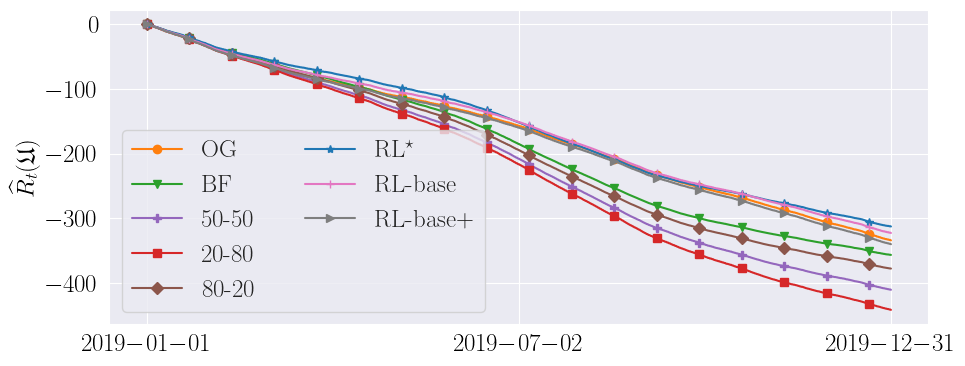

In [73]:
objective_function(test_profile=None)

In [36]:
def objective_function_with_baseline(sampling_rate=1, reward_type='pure_reward', baseline='20-80'):
    data = {}
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)

    profiles = list(range(len(res_dict['only_market'])))
    #profiles.remove(1)
    #profiles.remove(15)
    #profiles.remove(27)

    for i, alg in enumerate(algs):
        trad_diff = np.mean([np.array(res_dict[alg][i][reward_type]['r_trad']) - np.array(res_dict[baseline][i][reward_type]['r_trad']) 
                             for i in profiles], axis=0) 
        op_diff = np.mean([np.array(res_dict[alg][i][reward_type]['r_op']) - np.array(res_dict[baseline][i][reward_type]['r_op']) 
                             for i in profiles], axis=0)  
        deg_diff = np.mean([np.array(res_dict[alg][i][reward_type]['r_deg']) - np.array(res_dict[baseline][i][reward_type]['r_deg']) 
                             for i in profiles], axis=0) 
        
        #total_diff = np.cumsum(np.sum([trad_diff, op_diff], axis=0))
        total_diff = np.cumsum(np.sum([trad_diff, deg_diff], axis=0))

        stds = np.std([np.array(res_dict[alg][i][reward_type]['r_trad']) - np.array(res_dict[baseline][i][reward_type]['r_trad']) 
                       for i in profiles], axis=0)
        ci_trads = 1.96 * stds/np.sqrt(len(profiles))
        stds = np.std([np.array(res_dict[alg][i][reward_type]['r_op']) - np.array(res_dict[baseline][i][reward_type]['r_op'])
                       for i in profiles], axis=0)
        ci_op = 1.96 * stds/np.sqrt(len(profiles))
        stds = np.std([np.array(res_dict[alg][i][reward_type]['r_deg']) - np.array(res_dict[baseline][i][reward_type]['r_deg'])
                       for i in profiles], axis=0)
        ci_deg = 1.96 * stds/np.sqrt(len(profiles))

        #total_ci = np.cumsum(np.sum([ci_trads, ci_op], axis=0))
        total_ci = np.cumsum(np.sum([ci_trads, ci_deg], axis=0))

        ax.plot(timestamps[::sampling_rate], (total_diff)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        #ax.fill_between(timestamps[::sampling_rate], total_diff[::sampling_rate] + total_ci[::sampling_rate], 
        #                    total_diff[::sampling_rate] - total_ci[::sampling_rate],
        #                    color=alg_color[alg], 
        #                    alpha=0.1)
        ax.set(ylabel=r'$\widehat{\mathcal{R}}_t(\mathfrak{U}) - \widehat{\mathcal{R}}_t(\mathcal{B})$', 
               xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        ax.legend(loc='best', ncols=[5,5])
        #ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=8, mode="expand")
    
    savefig(fig, filename='{}-obj_func_with_baseline_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-obj_func_with_baseline_{}.png'.format(exp_name, reward_type))

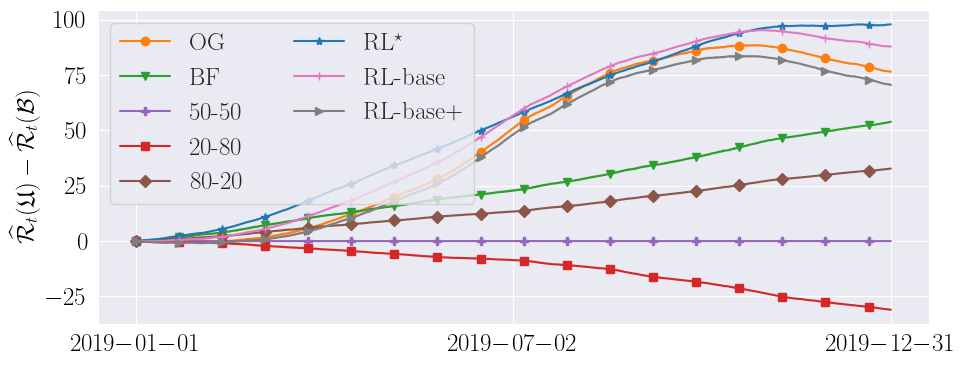

In [37]:
objective_function_with_baseline(baseline='50-50')

In [74]:
# Average return across all the test experiments throw boxplots
def average_return(r_type:str = 'norm_reward'):
    data = {}
    colors = []
    
    for alg in algs:
        if r_type == 'weighted_reward':
            data[alg_names[alg]] = [res_dict[alg][i]['total_reward'] for i in range(len(res_dict[alg]))]
        else:
            data[alg_names[alg]] = [sum(res_dict[alg][i][r_type]['r_trad'])
                                    #+ sum(res_dict[alg][i][r_type]['r_op']) 
                                    + sum(res_dict[alg][i][r_type]['r_deg'])  
                                    #sum(res_dict[alg][i][r_type]['r_clip'])
                                    for i in range(len(res_dict[alg]))]
        colors.append(alg_color[alg])
            
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
    box_plot = sns.boxplot(data, gap=.1, palette=colors, width=.8)
    
    medians = [np.mean(values) for key, values in data.items()]
    vertical_offset = -130 # offset from median for display

    for xtick, alg in zip(box_plot.get_xticks(), algs):
        box_plot.text(xtick, 
                      vertical_offset, 
                      round(medians[xtick]), 
                      horizontalalignment='center',
                      size='x-small', 
                      color=alg_color[alg], 
                      weight='semibold')

    ax.set(ylabel=r'$\widehat{R}_\mathcal{T}\,(\mathfrak{U})$')
    
    savefig(fig, filename='{}-boxplot_obj_func.pdf'.format(exp_name))
    savefig(fig, filename='{}-boxplot_obj_func.png'.format(exp_name))

    return data

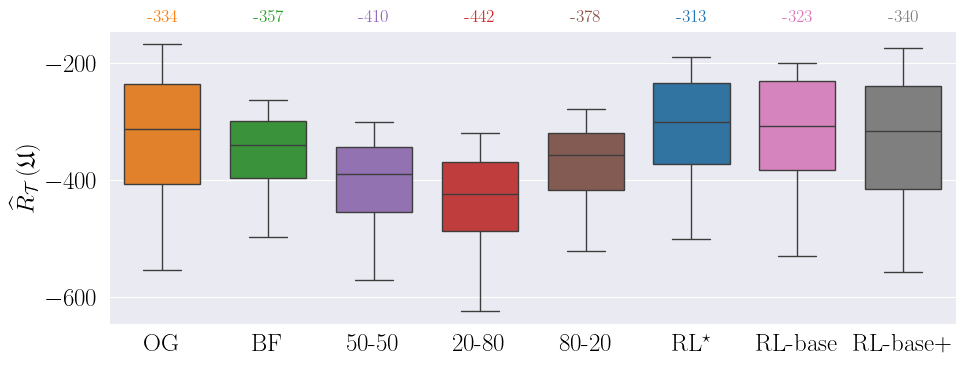

In [75]:
df = pd.DataFrame.from_dict(average_return(r_type='pure_reward'))

In [40]:
df.describe()

,OG,BF,50-50,20-80,80-20,RL$^{\star}$,RL-base,RL-base+
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,-334.127499,-356.585674,-410.488197,-441.543046,-377.727531,-312.652444,-322.681020,-340.056448
std,117.340200,70.389921,79.281879,86.487228,73.782140,94.984648,107.841074,115.886363
min,-553.934008,-496.910898,-570.735595,-623.109093,-521.173292,-500.694285,-529.584578,-557.479798
25%,-406.694863,-396.278141,-455.070950,-487.340963,-417.511917,-373.161086,-383.227052,-415.580588
50%,-313.199337,-339.633125,-390.223967,-424.461288,-357.818555,-300.442474,-307.325849,-316.874408
75%,-235.873961,-299.319434,-343.399210,-369.154592,-319.526140,-234.695966,-230.443453,-238.503984
max,-167.903152,-262.512821,-300.769594,-320.267040,-277.749603,-190.125200,-200.650125,-174.173324


In [41]:
def cum_average_reward_terms_comparison(sampling_rate=1, reward_type='weighted_reward'):
    data = {}
    fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(12, 16), tight_layout=True)
    
    for i, alg in enumerate(algs):
        y = [res_dict[alg][i][reward_type]['r_trad'] for i in range(len(res_dict[alg]))]
        stds = np.std(y, axis=0)
        ci = np.cumsum(1.96 * stds/np.sqrt(len(res_dict[alg])))
        means = np.mean(y, axis=0)
        ax1.plot(timestamps[::sampling_rate], np.cumsum(means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax1.fill_between(timestamps[::sampling_rate], np.cumsum(means) + ci, np.cumsum(means) - ci, color=alg_color[alg], alpha=0.1)
        ax1.set(xlabel='Time', ylabel='Avg. Trading Reward', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        ax1.legend(ncols=[5,5])

        y = [res_dict[alg][i][reward_type]['r_op'] for i in range(len(res_dict[alg]))]
        stds = np.std(y, axis=0)
        ci = 1.96 * np.cumsum(stds)/np.sqrt(len(res_dict[alg]))
        means = np.mean(y, axis=0)
        ax2.plot(timestamps[::sampling_rate], np.cumsum(means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax2.fill_between(timestamps[::sampling_rate], np.cumsum(means) + ci, np.cumsum(means) - ci, color=alg_color[alg], alpha=0.1)
        ax2.set(xlabel='Time', ylabel='Avg. Operational Cost', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
        ax2.legend(ncols=[5,5])

        y = [res_dict[alg][i][reward_type]['r_deg'] for i in range(len(res_dict[alg]))]
        stds = np.std(y, axis=0)
        ci = 1.96 * np.cumsum(stds)/np.sqrt(len(res_dict[alg]))
        means = np.mean(y, axis=0)
        ax3.plot(timestamps[::sampling_rate], np.cumsum(means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax3.fill_between(timestamps[::sampling_rate], np.cumsum(means) + ci, np.cumsum(means) - ci, color=alg_color[alg], alpha=0.1)
        ax3.set(xlabel='Time', ylabel='Avg. Degradation Cost', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
        ax3.legend(ncols=[5,5])

        if res_dict[alg][0][reward_type]['r_clip']:
            y = [res_dict[alg][i][reward_type]['r_clip'] for i in range(len(res_dict[alg]))]
            stds = np.std(y, axis=0)
            ci = 1.96 * np.cumsum(stds)/np.sqrt(len(res_dict[alg]))
            means = np.mean(y, axis=0)
            ax4.plot(timestamps[::sampling_rate], np.cumsum(means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
            ax4.fill_between(timestamps[::sampling_rate], np.cumsum(means) + ci, np.cumsum(means) - ci, color=alg_color[alg], alpha=0.1)
            ax4.set(xlabel='Time', ylabel='Avg. Action Clipping', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
            ax4.legend(ncols=[5,5])
            
    savefig(fig, filename='{}-avg_cum_terms_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-avg_cum_terms_{}.png'.format(exp_name, reward_type))

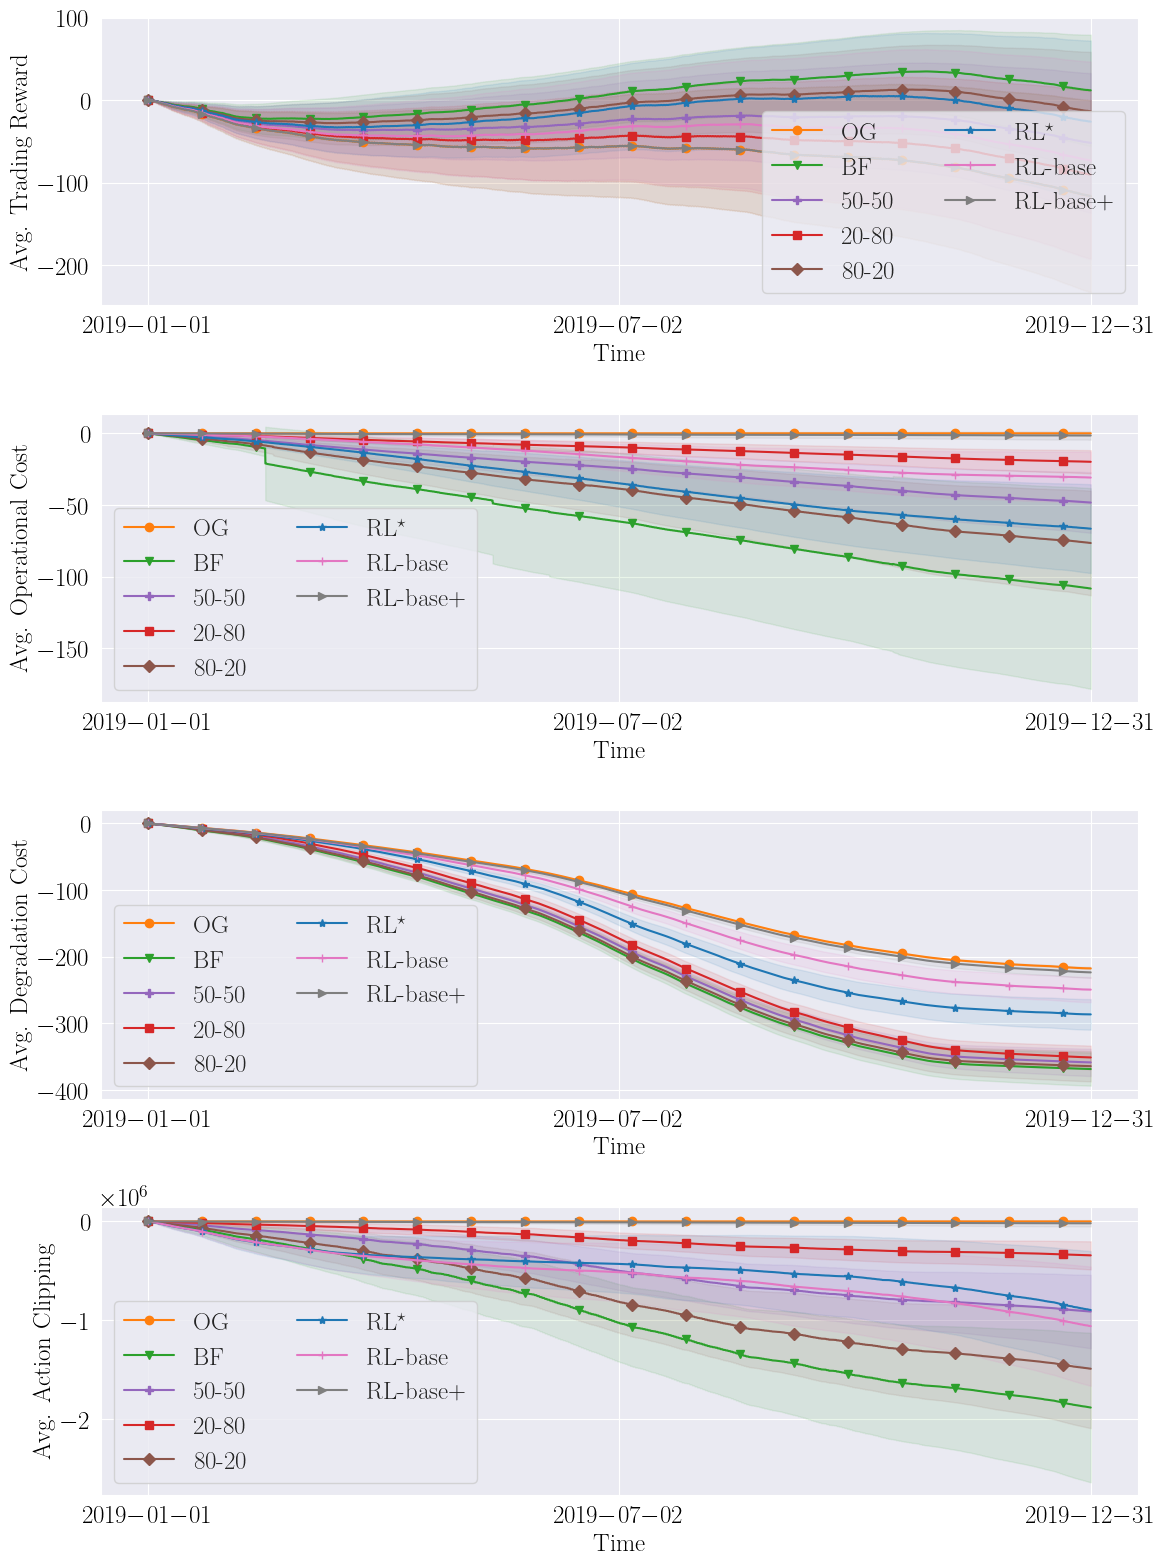

In [42]:
cum_average_reward_terms_comparison(reward_type='pure_reward')

In [66]:
def average_total_reward_with_baseline(sampling_rate=10, reward_type='weighted_reward', baseline='20-80'):
    data = {}
    fig, ax = plt.subplots(figsize=(12, 4), tight_layout=True)
    
    trad_means = np.mean([res_dict[baseline][i][reward_type]['r_trad'] for i in range(len(res_dict[baseline]))], axis=0)     
    op_means = np.mean([res_dict[baseline][i][reward_type]['r_op'] for i in range(len(res_dict[baseline]))], axis=0) 
    deg_means = np.mean([res_dict[baseline][i][reward_type]['r_deg'] for i in range(len(res_dict[baseline]))], axis=0) 
    if res_dict['random'][0][reward_type]['r_clip']:
        clip_means = np.mean([res_dict[baseline][i][reward_type]['r_clip'] for i in range(len(res_dict[baseline]))], axis=0)     
        baseline_reward = np.cumsum(np.sum([trad_means, op_means, deg_means, clip_means], axis=0))
    else:
        baseline_reward = np.cumsum(np.sum([trad_means, op_means, deg_means], axis=0))

    for i, alg in enumerate(algs):
        trad_means = np.mean([res_dict[alg][i][reward_type]['r_trad'] for i in range(len(res_dict[alg]))], axis=0)     
        op_means = np.mean([res_dict[alg][i][reward_type]['r_op'] for i in range(len(res_dict[alg]))], axis=0)     
        deg_means = np.mean([res_dict[alg][i][reward_type]['r_deg'] for i in range(len(res_dict[alg]))], axis=0)  
        if res_dict['random'][0][reward_type]['r_clip']:
            clip_means = np.mean([res_dict[alg][i][reward_type]['r_clip'] for i in range(len(res_dict[alg]))], axis=0)
            total_reward = np.cumsum(np.sum([trad_means, op_means, deg_means, clip_means], axis=0))
        else:
           total_reward = np.cumsum(np.sum([trad_means, op_means, deg_means], axis=0))
        
        ax.plot(timestamps[::sampling_rate], (total_reward - baseline_reward)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=5000)
        ax.set(xlabel='Time', ylabel="Delta cum. reward", xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        ax.legend()
    
    savefig(fig, filename='{}-avg_cum_reward_with_baseline_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-avg_cum_reward_with_baseline_{}.png'.format(exp_name, reward_type))

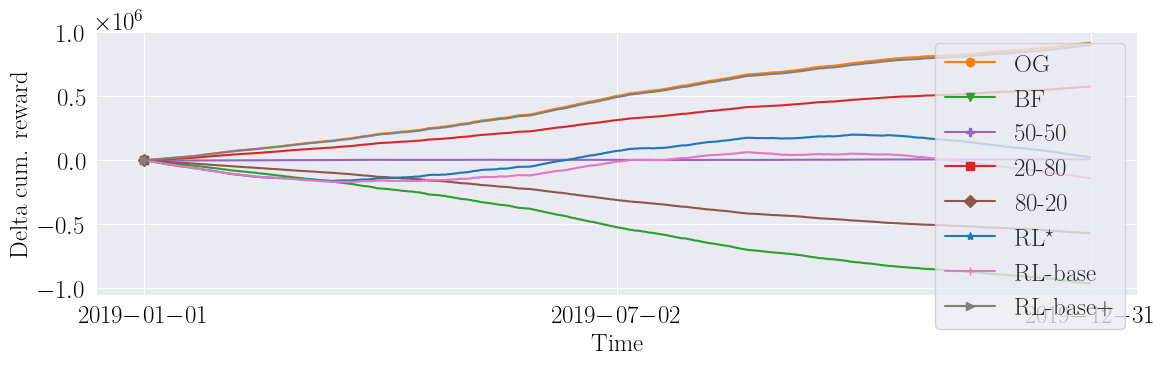

In [67]:
average_total_reward_with_baseline(reward_type='pure_reward', baseline='random')

In [76]:
def cum_average_r_trad_with_baseline(sampling_rate=1, reward_type='weighted_reward', baseline='20-80'):
    data = {}
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=False)
    
    trad_means = np.mean([res_dict[baseline][i][reward_type]['r_trad'] for i in range(len(res_dict[baseline]))], axis=0)     

    for i, alg in enumerate(algs):
        means = np.mean([res_dict[alg][i][reward_type]['r_trad'] for i in range(len(res_dict[alg]))], axis=0)     
        ax.plot(timestamps[::sampling_rate], np.cumsum(means - trad_means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax.set(ylabel=r'$\Delta\widehat{R}_{trad, \mathcal{T}} \,(\mathfrak{U},50$-$50)$', 
                xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        #ax.legend(loc='best', ncols=[3,5,8])
        
    savefig(fig, filename='{}-avg_cum_r-trad_with_baseline_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-avg_cum_r-trad_with_baseline_{}.png'.format(exp_name, reward_type))

In [77]:
def cum_average_r_deg_with_baseline(sampling_rate=1, reward_type='weighted_reward', baseline='20-80'):
    data = {}
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=False)
    
    trad_means = np.mean([res_dict[baseline][i][reward_type]['r_deg'] for i in range(len(res_dict[baseline]))], axis=0)     

    for i, alg in enumerate(algs):
        means = np.mean([res_dict[alg][i][reward_type]['r_deg'] for i in range(len(res_dict[alg]))], axis=0)     
        ax.plot(timestamps[::sampling_rate], np.cumsum(means - trad_means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax.set(ylabel=r'$\Delta\widehat{R}_{deg, \mathcal{T}} \,(\mathfrak{U},50$-$50)$', 
                xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        ax.legend(loc='best', ncols=[5,5])
        
    savefig(fig, filename='{}-avg_cum_r-deg_with_baseline_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-avg_cum_r-deg_with_baseline_{}.png'.format(exp_name, reward_type))


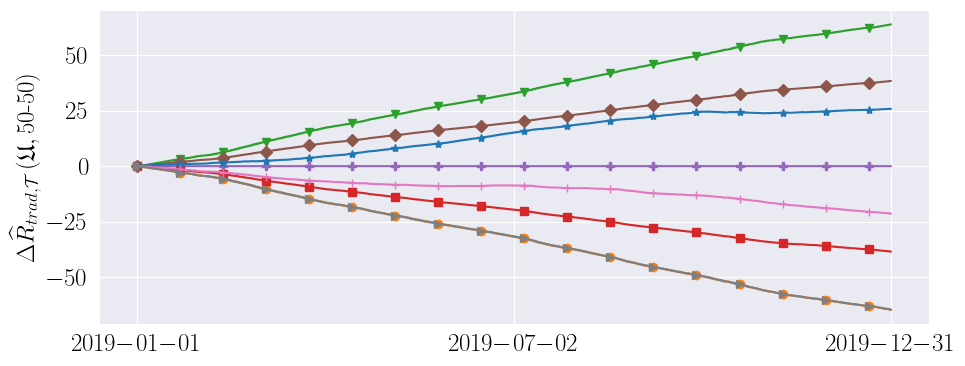

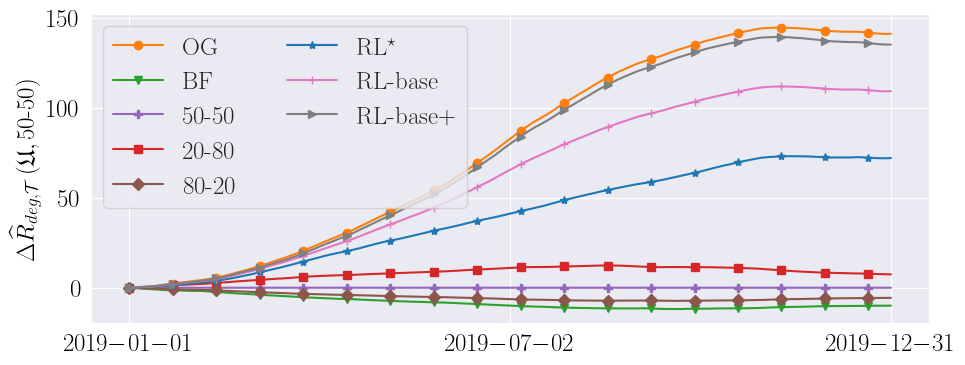

In [78]:
cum_average_r_trad_with_baseline(reward_type='pure_reward', baseline='50-50')
cum_average_r_deg_with_baseline(reward_type='pure_reward', baseline='50-50')

In [58]:
def cum_average_reward_terms_with_baseline(sampling_rate=1, reward_type='weighted_reward', baseline='20-80'):
    data = {}
    fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(10, 16), tight_layout=False)
    
    trad_means = np.mean([res_dict[baseline][i][reward_type]['r_trad'] for i in range(len(res_dict[baseline]))], axis=0)     
    op_means = np.mean([res_dict[baseline][i][reward_type]['r_op'] for i in range(len(res_dict[baseline]))], axis=0) 
    deg_means = np.mean([res_dict[baseline][i][reward_type]['r_deg'] for i in range(len(res_dict[baseline]))], axis=0)     
    clip_means = np.mean([res_dict[baseline][i][reward_type]['r_clip'] for i in range(len(res_dict[baseline]))], axis=0)     
    
    for i, alg in enumerate(algs):
        means = np.mean([res_dict[alg][i][reward_type]['r_trad'] for i in range(len(res_dict[alg]))], axis=0)     
        ax1.plot(timestamps[::sampling_rate], np.cumsum(means - trad_means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax1.set(ylabel=r'$\Delta\widehat{R}_{trad, \mathcal{T}} \,(\mathfrak{U},50$-$50)$', 
                xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         
        ax1.legend(loc='best', ncols=[3,5,8])
        
        means = np.mean([res_dict[alg][i][reward_type]['r_op'] for i in range(len(res_dict[alg]))], axis=0)
        ax2.plot(timestamps[::sampling_rate], np.cumsum(means - op_means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax2.set(ylabel=r'$\Delta\widehat{R}_{op, \mathcal{T}}\,(\mathfrak{U},50$-$50)$', 
                xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
        ax2.legend(loc='best', ncols=[5,5])

        means = np.mean([res_dict[alg][i][reward_type]['r_deg'] for i in range(len(res_dict[alg]))], axis=0)
        ax3.plot(timestamps[::sampling_rate], np.cumsum(means - deg_means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax3.set(ylabel=r'$\Delta\widehat{R}_{deg, \mathcal{T}}\,(\mathfrak{U},50$-$50)$', 
                xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
        ax3.legend(loc='best', ncols=[5,5])        
        
        means = np.mean([res_dict[alg][i][reward_type]['r_clip'] for i in range(len(res_dict[alg]))], axis=0)
        ax4.plot(timestamps[::sampling_rate], np.cumsum(means - clip_means)[::sampling_rate], label=alg_names[alg], color=alg_color[alg], marker=alg_markers[alg], markevery=500)
        ax4.set(ylabel=r'$\Delta\widehat{R}_{clip, \mathcal{T}}\,(\mathfrak{U},50$-$50)$', 
                xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
        ax4.legend(loc='best', ncols=[5,5])

    # Save Ax1
    extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    savefig(fig, filename='{}-avg_cum_r-trad_with_baseline_{}.pdf'.format(exp_name, reward_type), extent=extent)
    savefig(fig, filename='{}-avg_cum_r-trad_with_baseline_{}.png'.format(exp_name, reward_type), extent=extent)

    # Save Ax3
    extent = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    savefig(fig, filename='{}-avg_cum_r-deg_with_baseline_{}.pdf'.format(exp_name, reward_type), extent=extent)
    savefig(fig, filename='{}-avg_cum_r-deg_with_baseline_{}.png'.format(exp_name, reward_type), extent=extent)

    # Save Ax4
    #extent = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #savefig(fig, filename='{}-avg_cum_r-clip_with_baseline_{}.pdf'.format(exp_name, reward_type), extent=extent.expanded(1.1, 1.2))
    #savefig(fig, filename='{}-avg_cum_r-clip_with_baseline_{}.png'.format(exp_name, reward_type), extent=extent.expanded(1.1, 1.2))
    
    savefig(fig, filename='{}-avg_cum_terms_with_baseline_{}.pdf'.format(exp_name, reward_type))
    savefig(fig, filename='{}-avg_cum_terms_with_baseline_{}.png'.format(exp_name, reward_type))

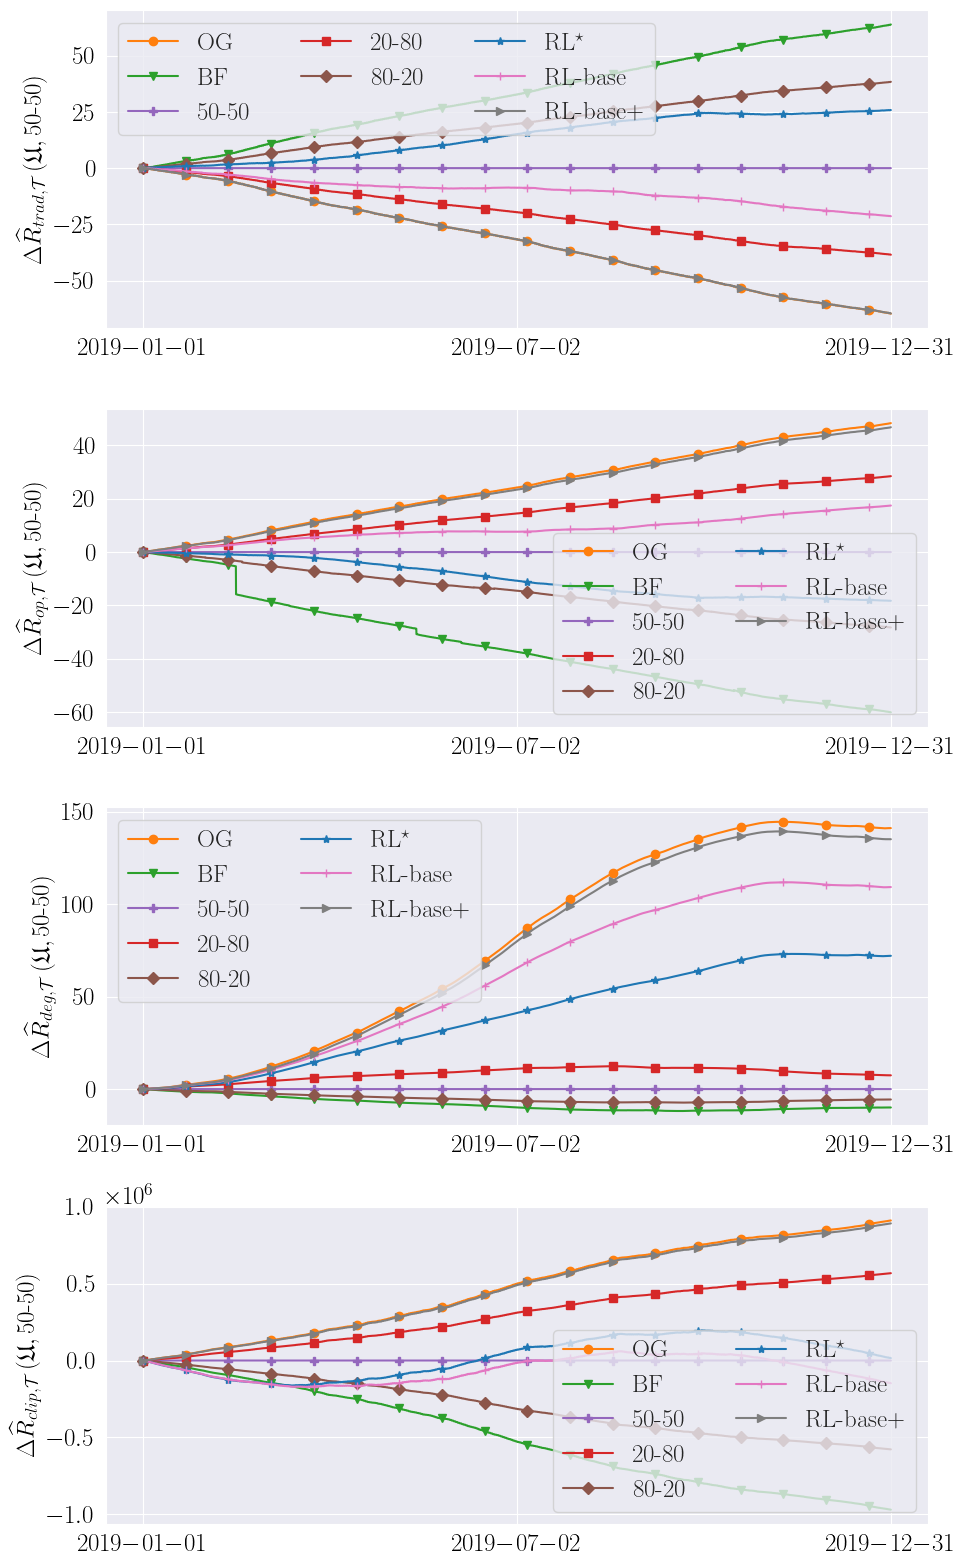

In [59]:
cum_average_reward_terms_with_baseline(reward_type='pure_reward', baseline='50-50')

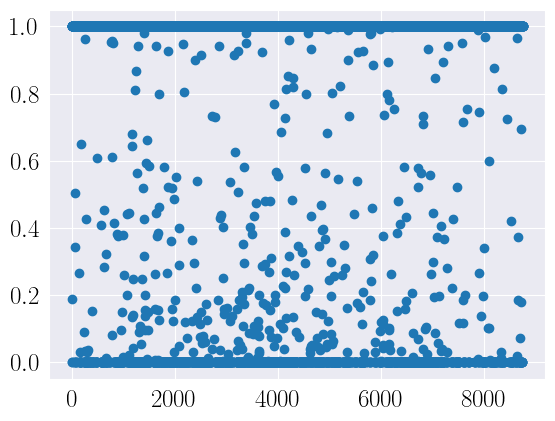

In [50]:
plt.scatter(range(len(res_dict['ppo'][24]['actions'])), res_dict['ppo'][24]['actions'])

In [96]:
def heatmap(test_profile=0, var='demand'):

    obs_dict = {'temperature': 0,
                'soc': 1,
                'demand': 2,
                'generation': 3,
                'ask': 4,
                'bid': 5,
                'sin_day_of_year': 6,
                'cos_day_of_year': 7,
                'sin_seconds_of_day': 8,
                'cos_seconds_of_day': 9,
               }

    obs_var = obs_dict[var]
    
    # Continuous states and actions
    state_list = [s[obs_var] for s in res_dict['ppo'][test_profile]['states']][:-1] 
    action_list = [a[0] for a in res_dict['ppo'][test_profile]['actions']]
    
    num_state_bins = 11
    num_action_bins = 11
    
    # Generate bins based on the range of states and actions
    state_bins = np.linspace(min(state_list), 2000, num_state_bins)
    action_bins = np.linspace(min(action_list), max(action_list), num_action_bins)
    
    # Create a 2D histogram to count occurrences of state-action pairs
    heatmap, xedges, yedges = np.histogram2d(state_list, action_list, bins=[state_bins, action_bins])
    
    # Plot the heatmap
    fig = plt.figure(figsize=(10, 5))
    sns.heatmap(np.log(heatmap.T + 1), 
                cmap="icefire", 
                cbar=True,
                xticklabels=[int(s+100) for s in state_bins[:-1]], 
                yticklabels=np.round(action_bins[:-1] + 0.05, 2))
    
    # Adding labels and title
    plt.xlabel(r"$\mathcal{P}^{\,(i)}_D$")
    plt.ylabel(r"$a$")
    plt.xticks(rotation=0)

    savefig(fig, filename='heatmap_on_{}.pdf'.format(var))
    savefig(fig, filename='heatmap_on_{}.png'.format(var))

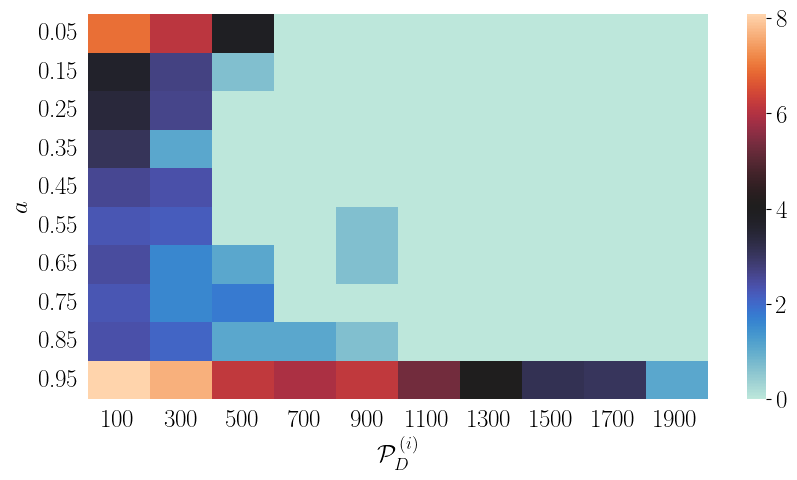

In [97]:
heatmap(var='demand')

In [86]:
max([s[2] for s in res_dict['ppo'][0]['states']][:-1])

2005.0

In [38]:
return_dict = {alg: {} for alg in algs}

for alg in algs:
    for i in range(len(res_dict[alg])):
        return_dict[alg][res_dict[alg][i]['test']] = np.sum(res_dict[alg][i]['pure_reward']['r_trad']) + \
                                                            np.sum(res_dict[alg][i]['pure_reward']['r_deg'])

In [39]:
df = pd.DataFrame.from_dict(return_dict).sort_index()

In [40]:
df

,only_market,battery_first,50-50,20-80,80-20,ppo,ppo_fixed_market_tamb,ppo_fixed_tamb
370,-484.189128,-464.256907,-524.571057,-566.861934,-488.416598,-435.568770,-461.242727,-485.701025
371,-167.903152,-262.512821,-300.769594,-320.267040,-277.749603,-216.643905,-205.473067,-174.173324
372,-232.715338,-312.497931,-340.409560,-353.774707,-324.222902,-290.598272,-290.809533,-268.511043
373,-217.331009,-289.436666,-334.125104,-360.224223,-306.437749,-203.332097,-201.671598,-219.404744
374,-338.314336,-353.371070,-401.003525,-430.643833,-372.595402,-334.808547,-323.842164,-340.243553
375,-236.926835,-294.284996,-344.395759,-372.131382,-314.195769,-212.790019,-213.783352,-237.559019
376,-519.465637,-470.695056,-533.870723,-572.181668,-495.698132,-455.882837,-497.317856,-523.642773
377,-373.903643,-371.712013,-431.250022,-469.068952,-394.601946,-349.523917,-376.472625,-377.465712
378,-402.090500,-402.241566,-458.214203,-491.914187,-424.517293,-377.931087,-378.848649,-413.445676
379,-257.268226,-300.997580,-353.222963,-383.928889,-321.575962,-252.597924,-232.138412,-270.654708


In [43]:
#df.to_csv('returns_for_test_profile.csv')

/var/folders/2j/2mbkhb5n5fg0fn1t37btqv140000gn/T/ipykernel_8912/381988931.py:33: RuntimeWarning: divide by zero encountered in log
  sns.heatmap(np.log(heatmap.T), cmap="icefire", cbar=True,


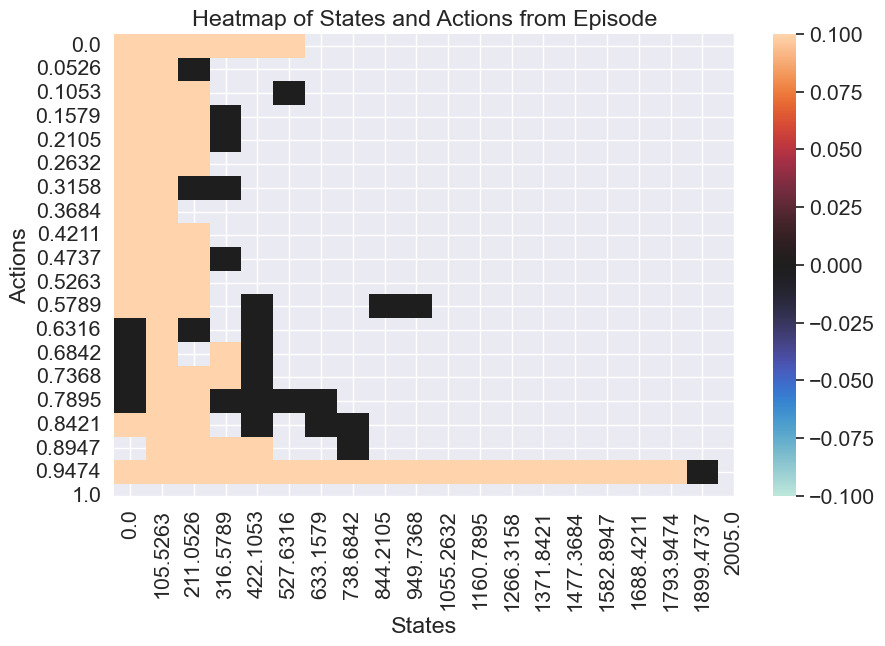

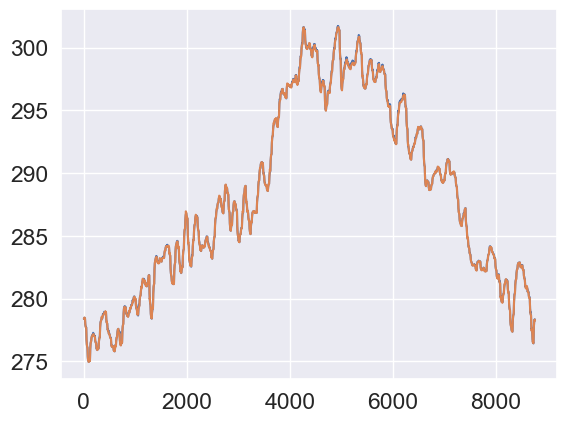

In [123]:
plt.plot([res_dict['ppo'][0]['states'][i][0] for i in range(len(res_dict['ppo'][0]['states']))])
plt.plot([res_dict['ppo_fixed_tamb'][0]['states'][i][0] for i in range(len(res_dict['ppo_fixed_tamb'][0]['states']))])

In [329]:
def single_policy_reward_terms(alg, reward_type='weighted_reward', test='', sampling_rate=1):    
    fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(12, 12), tight_layout=True)
    
    if not test:
        trad_list = np.mean([res_dict[alg][i][reward_type]['r_trad'] for i in range(len(res_dict[alg]))], axis=0)     
        op_list = np.mean([res_dict[alg][i][reward_type]['r_op'] for i in range(len(res_dict[alg]))], axis=0)     
        deg_list = np.mean([res_dict[alg][i][reward_type]['r_deg'] for i in range(len(res_dict[alg]))], axis=0)     
        clip_list = np.mean([res_dict[alg][i][reward_type]['r_clip'] for i in range(len(res_dict[alg]))], axis=0)     
    else:
        idx = [i for i in range(len(res_dict[alg])) if test == res_dict[alg][i]['test']][0]
        trad_list = res_dict[alg][idx][reward_type]['r_trad']   
        op_list = res_dict[alg][idx][reward_type]['r_op']     
        deg_list = res_dict[alg][idx][reward_type]['r_deg']     
        clip_list = res_dict[alg][idx][reward_type]['r_clip']     
    
    ax1.plot(timestamps[::sampling_rate], trad_list[::sampling_rate], label=alg_names[alg], color=alg_color[alg])
    ax1.set(xlabel='Time', ylabel='R_trad', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])         

    ax2.plot(timestamps[::sampling_rate], op_list[::sampling_rate], label=alg_names[alg], color=alg_color[alg])
    ax2.set(xlabel='Time', ylabel='R_op', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 

    ax3.plot(timestamps[::sampling_rate], deg_list[::sampling_rate], label=alg_names[alg], color=alg_color[alg])
    ax3.set(xlabel='Time', ylabel='R_deg', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]]) 
    
    ax4.plot(timestamps[::sampling_rate], clip_list[::sampling_rate], label=alg_names[alg], color=alg_color[alg])
    ax4.set(xlabel='Time', ylabel='R_clip', xticks=[timestamps[0], timestamps[len(timestamps)//2], timestamps[-1]])
    
    savefig(fig, filename='{}-avg_r_terms_{}_{}.pdf'.format(exp_name, alg, reward_type))
    savefig(fig, filename='{}-avg_r_terms_{}_{}.png'.format(exp_name, alg, reward_type))

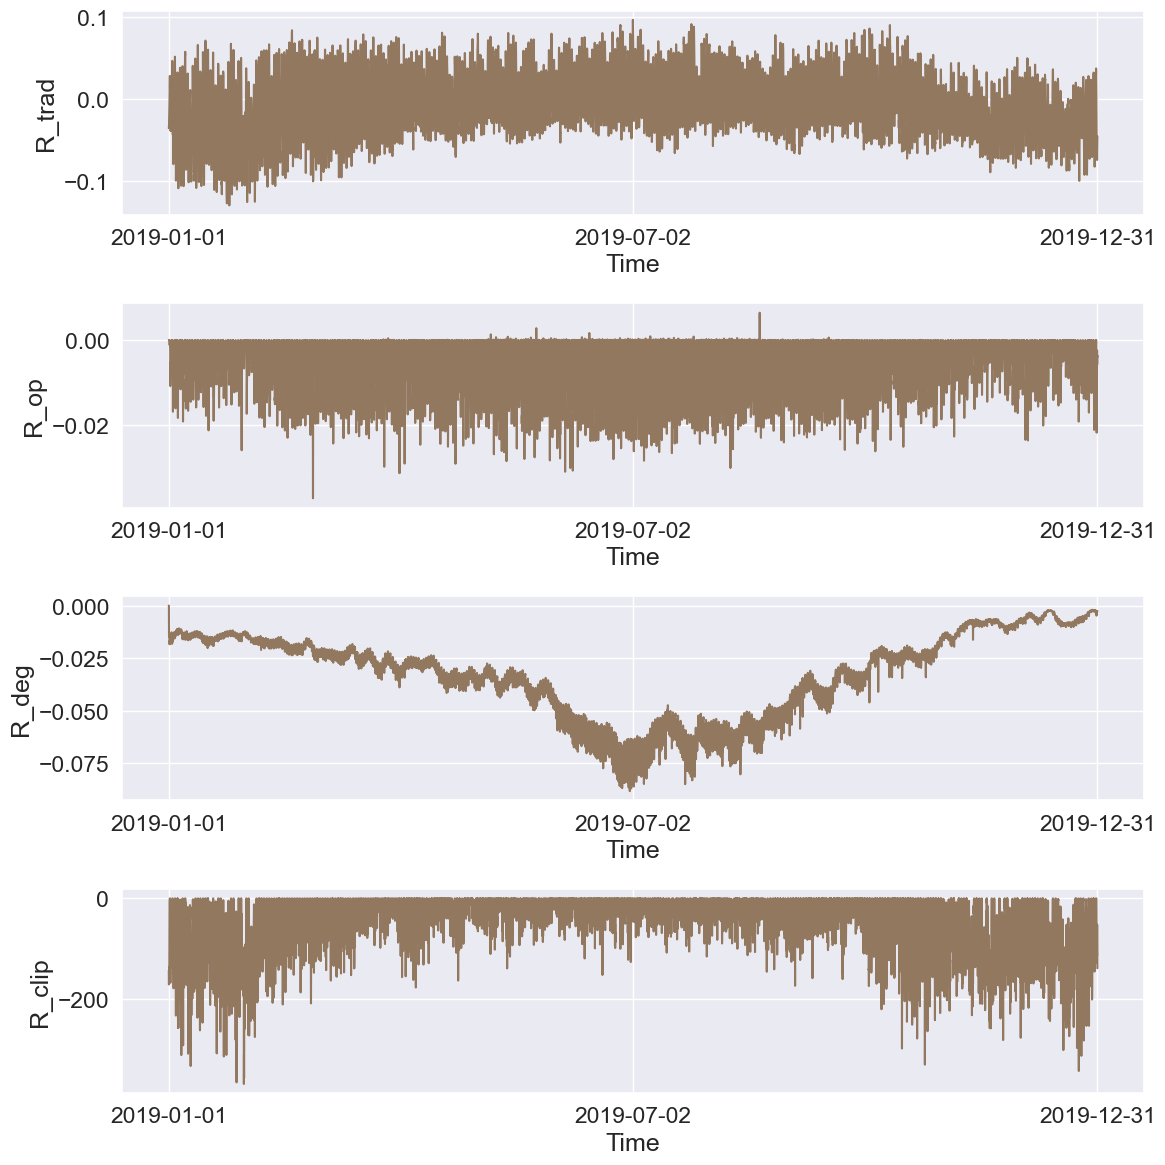

In [330]:
single_policy_reward_terms(alg='ppo', reward_type='pure_reward')

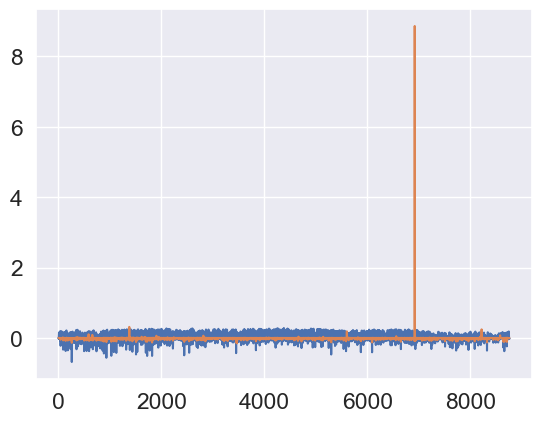

In [117]:
plt.plot(res_dict['only_market'][2]['pure_reward']['r_trad'])
plt.plot(res_dict['battery_first'][2]['pure_reward']['r_op'])

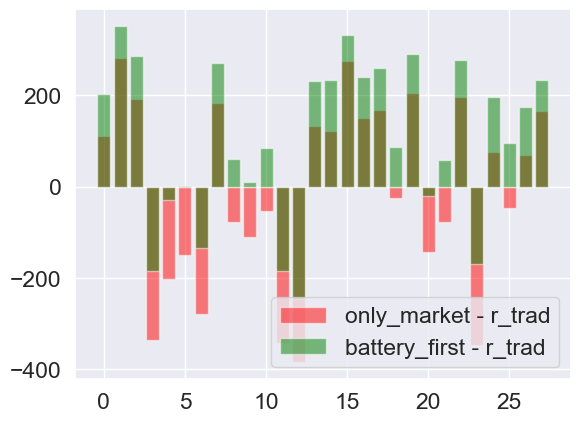

In [118]:
algo1 = 'only_market'
algo2 = 'battery_first'
r1 = 'r_trad'
r2 = 'r_trad'

plt.bar(range(len(res_dict['only_market'])), 
              [sum(res_dict[algo1][i]['pure_reward'][r1]) for i in range(len(res_dict['only_market']))], 
        label='{} - {}'.format(algo1, r1), 
        color='red',
        alpha=.5)


plt.bar(range(len(res_dict['only_market'])), 
              [sum(res_dict[algo2][i]['pure_reward'][r2]) for i in range(len(res_dict['only_market']))], 
        label='{} - {}'.format(algo2, r2), 
        color='green',
        alpha=.5)
plt.legend()

In [461]:
sum(res_dict['ppo'][3]['weighted_reward']['r_trad']), sum(res_dict['ppo'][3]['weighted_reward']['r_deg']), sum(res_dict['ppo'][3]['weighted_reward']['r_clip'])

(-817.3258538396608, -268.8393620483682, -558.8150690372634)

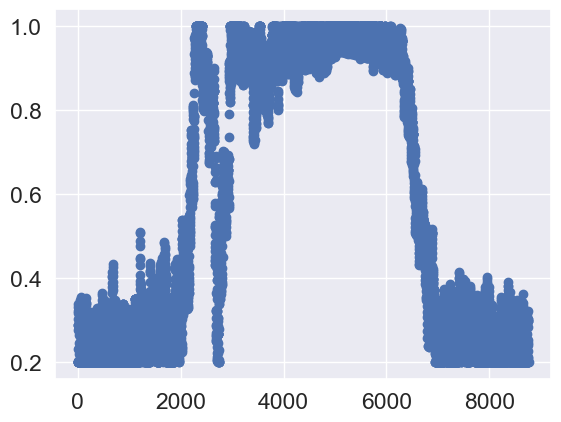

In [46]:
# SOC
plt.scatter(range(8760), [elem[1] for elem in res_dict['ppo'][7]['states']])

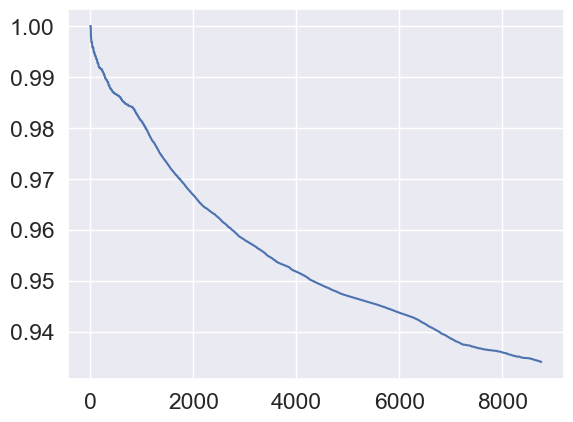

In [389]:
plt.plot([elem for elem in res_dict['battery_first'][7]['soh']])

In [194]:
np.mean(np.mean([res_dict['ppo'][i]['actions'] for i in range(len(res_dict['ppo']))], axis=0))

0.8167998487688757